## The Sparks Foundation - Data Science & Business Analytics Internship


### TASK 1 -----------Prediction using Supervised Machine Learning--------------
By using Linear Regression Supervised Learning Algorithm we will predict the percentage of students on the basis of no of hours they studied.
### Steps:
.Step 1 - Importing the dataset

.Step 2 - Visualizing the dataset

.Step 3 - Data preparation

.Step 4 - Training the algorithm

.Step 5 - Visualizing the model

.Step 6 - Making predcitions

.Step 7 - Evaluating the model

### Author: Abhishek Jadhav

 ### STEP 1 - Importing the dataset
 
In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data

In [2]:
# Importing all the required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
# Reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [4]:
# now let's observe the dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# To find the number of columns and rows 
df.shape

(25, 2)

In [7]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# now we will check if our dataset contains null or missings values  
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 2  - Visualizing the dataset

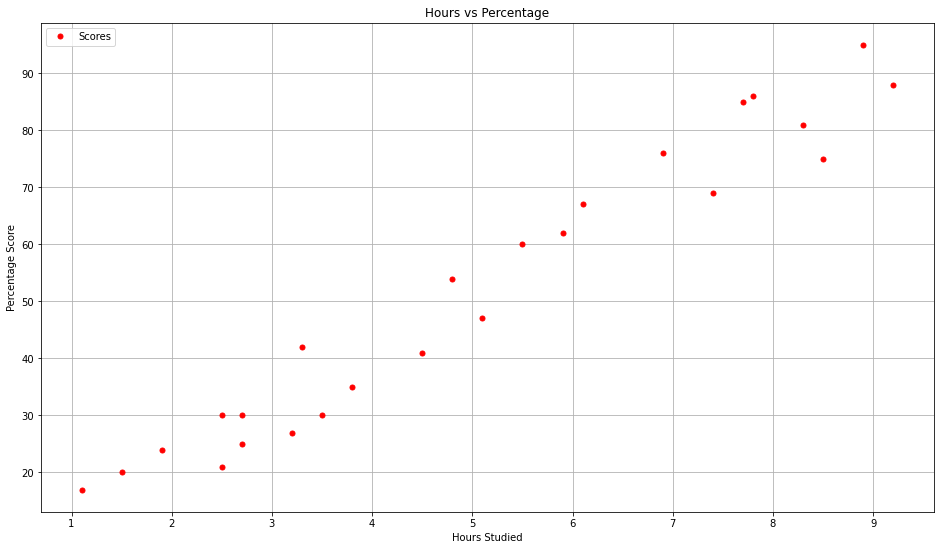

In [10]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours', y='Scores', style='.', color='Red', markersize=10)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

In [11]:
# we can also use .corr to determine the corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Step 3 - Data preparation¶

In [12]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
# using iloc function we will divide the data 
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values


In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [18]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

## Step 4 - Training the Algorithm

In [19]:

from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

## Step 5 - Visualizing the model 

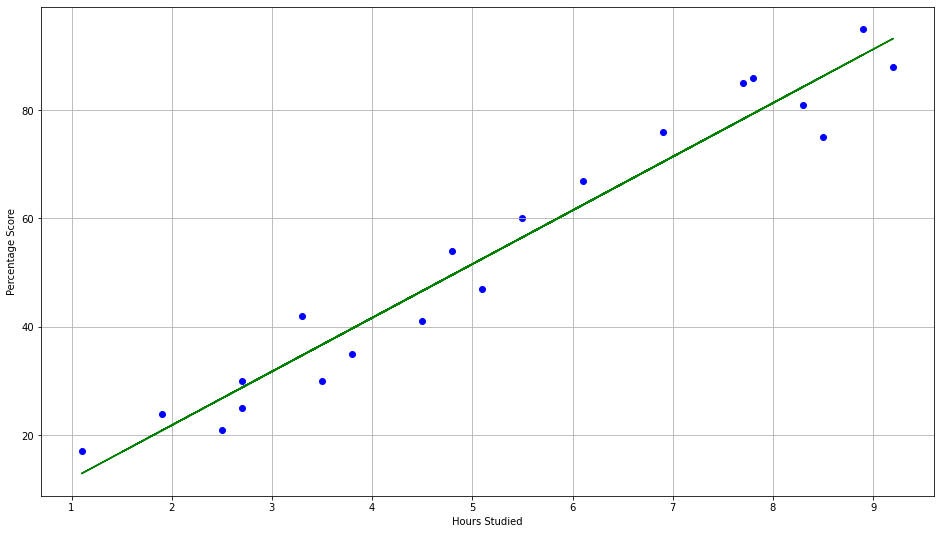

In [20]:

line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

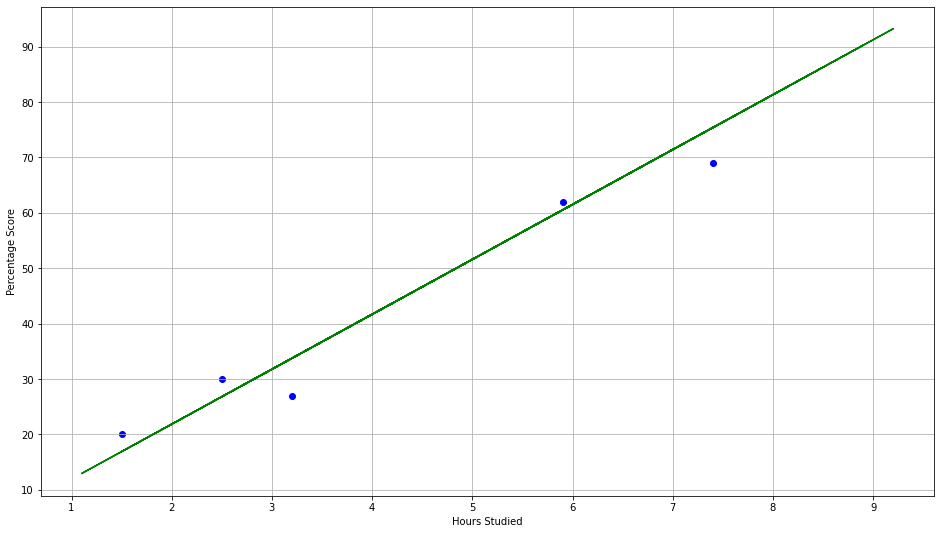

In [21]:

# Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color='blue')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## Step 6 - Making Predictions 

In [22]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
# Comparing Actual vs Predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [24]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [25]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [26]:

# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


## Step 7 - Evaluating the model 

In [27]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002975
